In [1]:
import lightgbm as lgb
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.regressor import StackingCVRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
Id = pd.DataFrame(test_df['Id'])
train_df.drop(['Id'], axis=1, inplace=True)
test_df.drop(['Id'], axis=1, inplace=True)

train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

true_label = pd.DataFrame(train_df.SalePrice)
train_df = train_df.drop(["SalePrice"],axis = 1)


In [3]:
display(train_df)
display(test_df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,8,2007,WD,Normal
7,60,RL,0.0,10382,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,0,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,0,1,2008,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,Inside,...,120,0,0,MnPrv,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,0,IR1,HLS,AllPub,Inside,...,144,0,0,0,0,0,1,2010,WD,Normal
5,60,RL,75.0,10000,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,4,2010,WD,Normal
6,20,RL,0.0,7980,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,63.0,8402,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,5,2010,WD,Normal
8,20,RL,85.0,10176,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
9,20,RL,70.0,8400,Pave,0,Reg,Lvl,AllPub,Corner,...,0,0,0,MnPrv,0,0,4,2010,WD,Normal


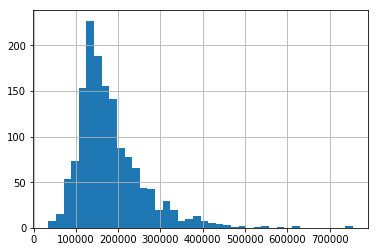

In [4]:
%matplotlib inline
true_label['SalePrice'].hist(bins = 40)

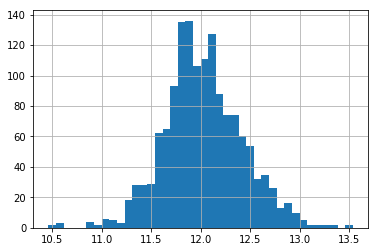

In [5]:
len(true_label['SalePrice'].unique())
true_label = np.log1p(true_label)
true_label['SalePrice'].hist(bins = 40)

In [6]:
combine_df = train_df.append(test_df)

# Since these column are actually a category , using a numerical number will lead the model to assume
# that it is numerical , so we convert to string .
combine_df['MSSubClass'] = combine_df['MSSubClass'].apply(str)
combine_df['YrSold'] = combine_df['YrSold'].astype(str)
combine_df['MoSold'] = combine_df['MoSold'].astype(str)



## Filling these columns With most suitable value for these columns 
combine_df['Functional'] = combine_df['Functional'].fillna('Typ') 
combine_df['Electrical'] = combine_df['Electrical'].fillna("SBrkr") 
combine_df['KitchenQual'] = combine_df['KitchenQual'].fillna("TA") 
combine_df["PoolQC"] = combine_df["PoolQC"].fillna("None")



## Filling these with MODE , i.e. , the most frequent value in these columns .
combine_df['Exterior1st'] = combine_df['Exterior1st'].fillna(combine_df['Exterior1st'].mode()[0]) 
combine_df['Exterior2nd'] = combine_df['Exterior2nd'].fillna(combine_df['Exterior2nd'].mode()[0])
combine_df['SaleType'] = combine_df['SaleType'].fillna(combine_df['SaleType'].mode()[0])

In [7]:
### Missing data in GarageYrBit most probably means missing Garage , so replace NaN with zero . 

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combine_df[col] = combine_df[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    combine_df[col] = combine_df[col].fillna('None')

    
### Same with basement

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combine_df[col] = combine_df[col].fillna('None')

In [8]:
combine_df['MSZoning'] = combine_df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))


In [9]:
combine_df = combine_df.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

In [10]:
combine_df['YrBltAndRemod']=combine_df['YearBuilt']+combine_df['YearRemodAdd']
combine_df['TotalSF']=combine_df['TotalBsmtSF'] + combine_df['1stFlrSF'] + combine_df['2ndFlrSF']

combine_df['Total_sqr_footage'] = (combine_df['BsmtFinSF1'] + combine_df['BsmtFinSF2'] +
                                 combine_df['1stFlrSF'] + combine_df['2ndFlrSF'])

combine_df['Total_Bathrooms'] = (combine_df['FullBath'] + (0.5 * combine_df['HalfBath']) +
                               combine_df['BsmtFullBath'] + (0.5 * combine_df['BsmtHalfBath']))

combine_df['Total_porch_sf'] = (combine_df['OpenPorchSF'] + combine_df['3SsnPorch'] +
                              combine_df['EnclosedPorch'] + combine_df['ScreenPorch'] +
                              combine_df['WoodDeckSF'])

In [11]:
combine_df['haspool'] = combine_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
combine_df['has2ndfloor'] = combine_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
combine_df['hasgarage'] = combine_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
combine_df['hasbsmt'] = combine_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
combine_df['hasfireplace'] = combine_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [12]:
combine_df.shape

(2919, 86)

In [13]:
one_hot_df = pd.get_dummies(combine_df)

In [14]:
train_df = one_hot_df[:1460]
test_df = one_hot_df[1460:]
display(train_df)
display(test_df)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0
5,85.0,14115,5,5,1993,1995,0.0,732.0,0.0,64.0,...,0,0,0,1,0,0,0,0,1,0
6,75.0,10084,8,5,2004,2005,186.0,1369.0,0.0,317.0,...,0,0,0,1,0,0,0,0,1,0
7,0.0,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,...,0,0,0,1,0,0,0,0,1,0
8,51.0,6120,7,5,1931,1950,0.0,0.0,0.0,952.0,...,0,0,0,1,1,0,0,0,0,0
9,50.0,7420,5,6,1939,1950,0.0,851.0,0.0,140.0,...,0,0,0,1,0,0,0,0,1,0


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0
5,75.0,10000,6,5,1993,1994,0.0,0.0,0.0,763.0,...,0,0,0,1,0,0,0,0,1,0
6,0.0,7980,6,7,1992,2007,0.0,935.0,0.0,233.0,...,0,0,0,1,0,0,0,0,1,0
7,63.0,8402,6,5,1998,1998,0.0,0.0,0.0,789.0,...,0,0,0,1,0,0,0,0,1,0
8,85.0,10176,7,5,1990,1990,0.0,637.0,0.0,663.0,...,0,0,0,1,0,0,0,0,1,0
9,70.0,8400,4,5,1970,1970,0.0,804.0,78.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
outliers = [30, 88, 462, 631, 1322]
train_df = train_df.drop(train_df.index[outliers])
true_label = true_label.drop(true_label.index[outliers])


In [16]:
overfit = []
for i in train_df.columns:
    counts = train_df[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train_df) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
train_df = train_df.drop(overfit, axis=1)
test_df = test_df.drop(overfit, axis=1)
overfit
display(train_df.shape)
display(true_label.shape)

(1455, 335)

(1455, 1)

In [17]:
random_seed = 10 # set seed for same train test data split
X_train, X_test, y_train, y_test = train_test_split(train_df, true_label, random_state=random_seed, test_size = 0.2)

In [18]:
def generate_upload_csv(df, Id):
    df = np.expm1(df)

    pred_SalePrice = pd.Series(df, name="SalePrice")
    res = pd.concat([Id, pred_SalePrice], axis=1)
    res.index += 1 
    res.to_csv("./result.csv", sep=',', index=False)
    
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=train_df):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

## Stacking

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))  

svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)        

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=8,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [21]:
from sklearn.utils.validation import column_or_1d
y = np.array(true_label).ravel()
y = column_or_1d(y, warn=False)
display(y.shape)

(1455,)

In [23]:
stack_gen = StackingCVRegressor(regressors=(lasso, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [24]:
score = cv_rmse(lasso , true_label)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

LASSO: 0.0001 (0.0000)
 2019-04-02 22:13:00.460169
SVR: 0.1792 (0.0346)
 2019-04-02 22:13:08.483628
lightgbm: 0.1215 (0.0336)
 2019-04-02 22:13:21.446369
gbr: 0.1197 (0.0359)
 2019-04-02 22:14:20.628754
xgboost: 0.1182 (0.0366)
 2019-04-02 22:17:13.547645


In [25]:
X = train_df
y = true_label

print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

y = column_or_1d(y, warn=False)
train_lgb = lgb.Dataset(X, y)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen


C:\Users\Administrator\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\AppData\Local\Programs\

Lasso


C:\Users\Administrator\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Svr


C:\Users\Administrator\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoosting
xgboost
lightgbm


In [26]:
def blend_models_predict(X):
    return ((0.05 * lasso_model_full_data.predict(X)) + \
            (0.15 * svr_model_full_data.predict(X)) + \
            (0.15 * gbr_model_full_data.predict(X)) + \
            (0.2 * xgb_model_full_data.predict(X)) + \
            (0.15 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.045001073910540534


In [27]:
print('Predict submission')
y_pred = blend_models_predict(test_df)
y_pred.shape

Predict submission


(1459,)

In [28]:
generate_upload_csv(y_pred,Id)